# Opera in Venice : Data visualisation

### Visualisations for Foundations of Digital Humanities project
>Fall 2025<br>
>Christophe Bitar, Eliott Bell<br>
>DH Master Students

## 0 - Basic visualisations

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import re
from scipy.spatial.distance import cosine
from scipy.signal import find_peaks
import networkx as nx
from collections import Counter

FILE_NAME = 'database_operas.csv'
TOP_NUMBER = 15                      # Choose the top you want to show

df = pd.read_csv(FILE_NAME)

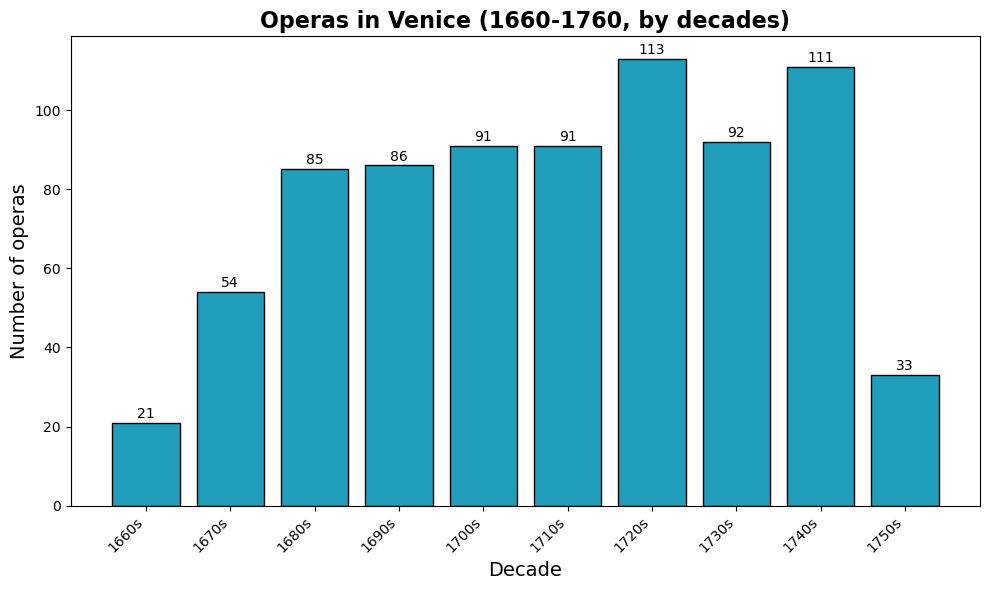

In [2]:
df['decade'] = (df['annee'] // 10) * 10

counts_by_decade = df['decade'].value_counts().sort_index()

# Visualisation

plt.figure(figsize=(10, 6))

decade_labels = [f'{int(d)}s' for d in counts_by_decade.index]

plt.bar(decade_labels, counts_by_decade.values, color='#219ebc', edgecolor='black')

plt.title("Operas in Venice (1660-1760, by decades)", fontsize=16, fontweight='bold')
plt.xlabel("Decade", fontsize=14)
plt.ylabel("Number of operas", fontsize=14)

for i, count in enumerate(counts_by_decade.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('histogram_decade.png')

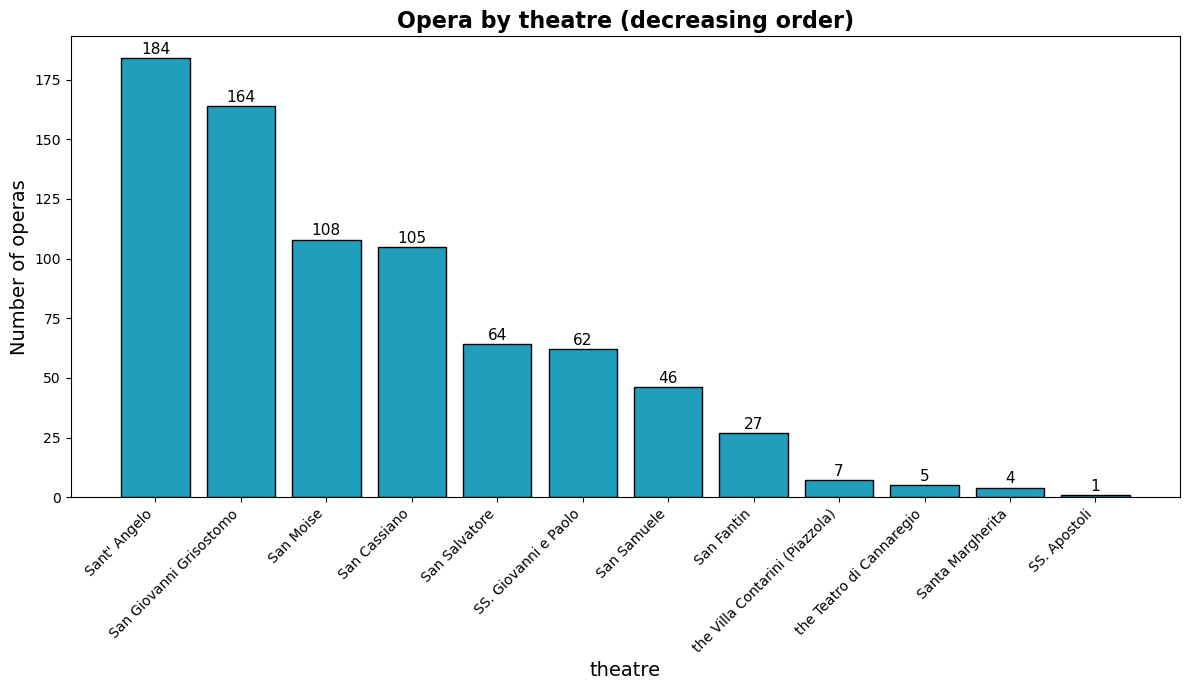

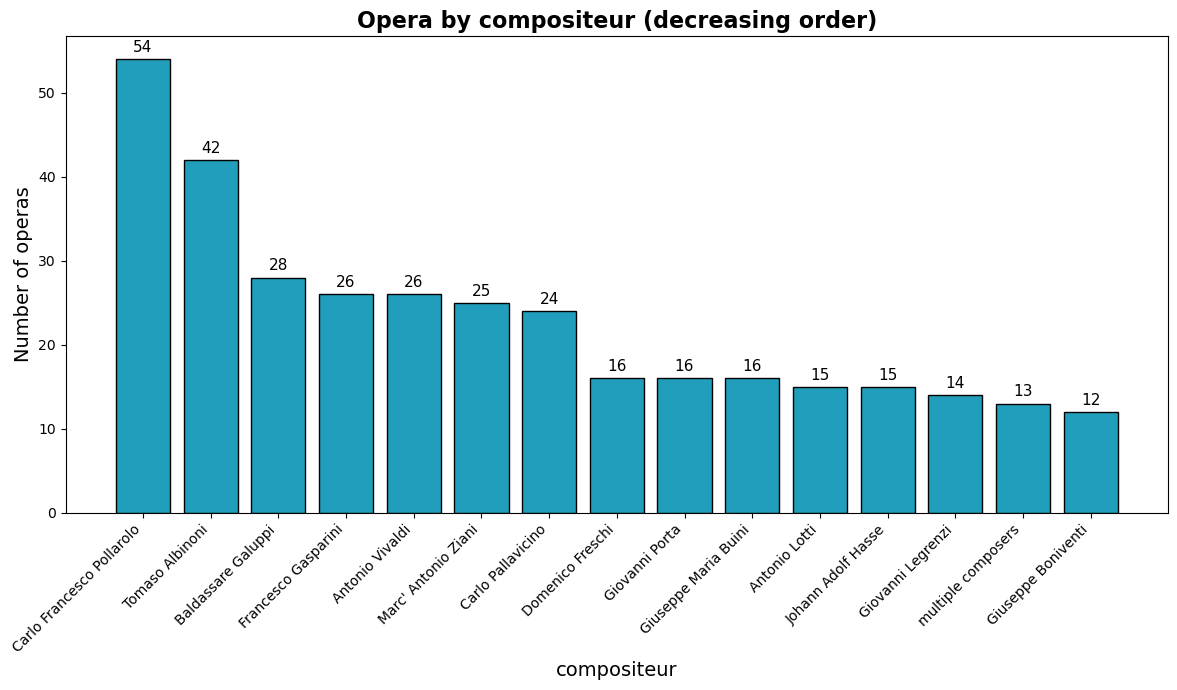

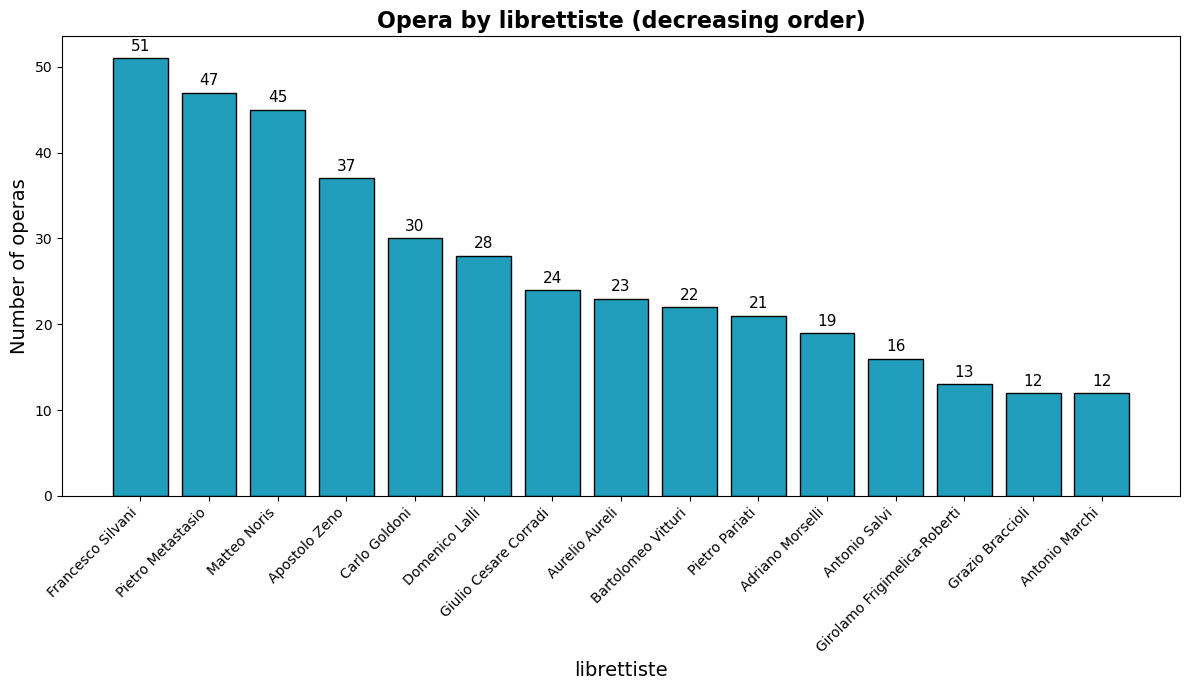

In [3]:
# Doing three graphs (top of theaters, composers and writers played), decreasing order

for instance in ['theatre', 'compositeur', 'librettiste']:
    counts_sorted = df[instance].value_counts().sort_values(ascending=False).head(TOP_NUMBER)

    # Visualisation
    
    plt.figure(figsize=(12, 7))

    bars = plt.bar(
        counts_sorted.index,
        counts_sorted.values,
        color=['#219ebc'],
        edgecolor='black'
    )

    plt.title(f"Opera by {instance} (decreasing order)", fontsize=16, fontweight='bold')
    plt.xlabel(f"{instance}", fontsize=14)
    plt.ylabel("Number of operas", fontsize=14)
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=11)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    output_file = f'histogram_operas_{instance}.png'
    plt.savefig(output_file)

In [4]:
pip install wikipedia

Note: you may need to restart the kernel to use updated packages.


In [5]:
## This cell is AI-Gen (Gemini 3.0)

import wikipedia
import re

def compter_mots_wikipedia(titre_page, langue='en'):
    """
    Récupère le contenu brut d'une page Wikipédia et compte le nombre de mots.

    Args:
        titre_page (str): Le titre de la page Wikipédia (ex: "Paris").
        langue (str): Le code de langue de Wikipédia (ex: 'fr' pour le français).

    Returns:
        int: Le nombre de mots dans la page, ou None en cas d'erreur.
    """
    try:
        # 1. Configurer la langue
        wikipedia.set_lang(langue)

        # 2. Récupérer l'objet page
        # 'auto_suggest=False' garantit que nous ne tombons pas sur une page non pertinente
        page = wikipedia.page(title=titre_page, auto_suggest=False)
        
        # 3. Récupérer le contenu (texte brut sans balisage)
        contenu = page.content

        # 4. Nettoyage du texte
        # La librairie wikipedia simplifie beaucoup, mais il peut rester des caractères spéciaux 
        # ou des lignes vides à cause des notes de bas de page.
        
        # Supprimer le balisage et les références entre crochets [] qui peuvent subsister
        contenu_nettoye = re.sub(r'\[.*?\]', '', contenu)
        
        # Remplacer tout ce qui n'est pas un mot par un espace unique
        # Cela inclut la ponctuation, les chiffres, etc.
        mots_list = re.findall(r'\b\w+\b', contenu_nettoye.lower())
        
        # 5. Compter les mots
        nombre_mots = len(mots_list)

        return nombre_mots

    except wikipedia.exceptions.PageError:
        print(f"La page '{titre_page}' n'a pas été trouvée sur Wikipédia ({langue}).")
        return 0
    except wikipedia.exceptions.DisambiguationError as e:
        print(f"Le terme '{titre_page}' est ambigu. Options possibles : {e.options[:5]}...")
        return 0
    except Exception as e:
        print(f"Une erreur inattendue s'est produite : {e}")
        return 0

La page 'multiple composers' n'a pas été trouvée sur Wikipédia (en).
La page 'Giuseppe Boniventi' n'a pas été trouvée sur Wikipédia (en).


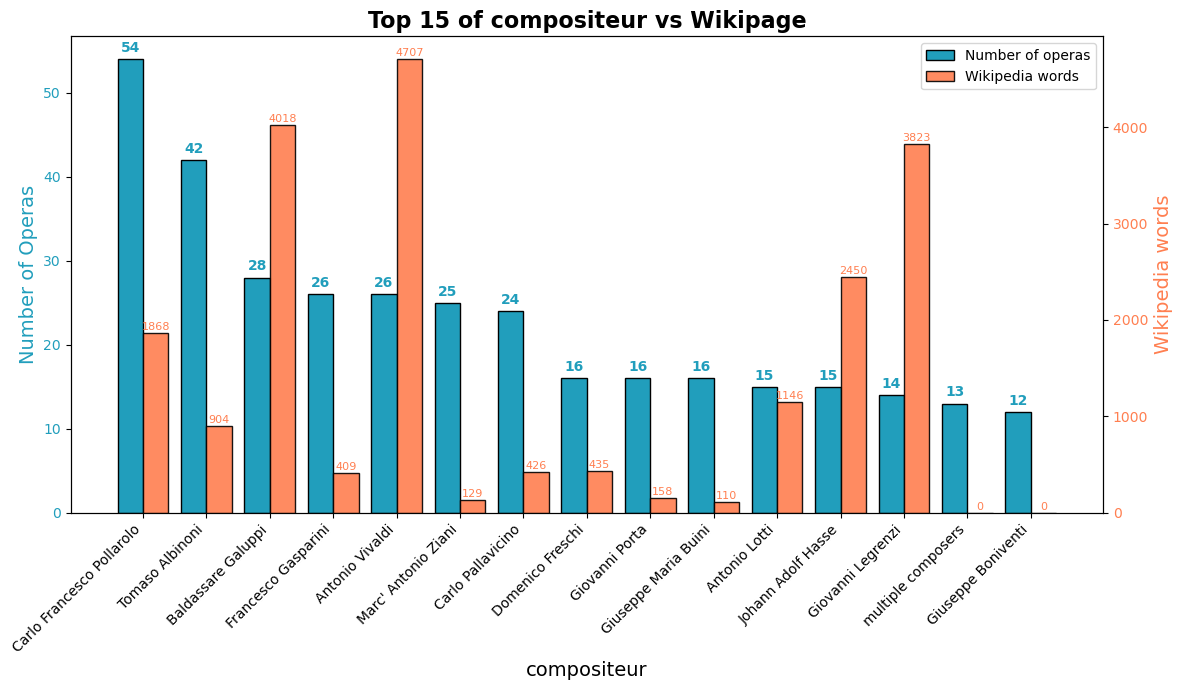

La page 'Francesco Silvani' n'a pas été trouvée sur Wikipédia (en).
La page 'Bartolomeo Vitturi' n'a pas été trouvée sur Wikipédia (en).
La page 'Girolamo Frigimelica-Roberti' n'a pas été trouvée sur Wikipédia (en).
La page 'Antonio Marchi' n'a pas été trouvée sur Wikipédia (en).


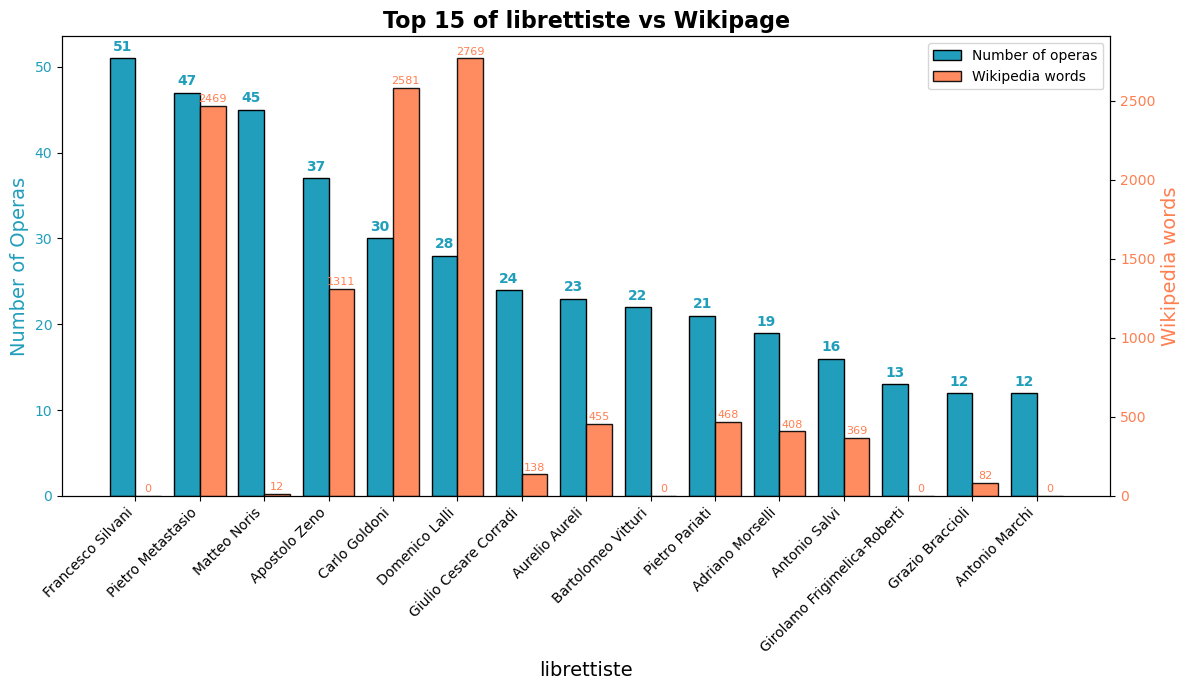

In [6]:
# Doing two graphs (top of composers and writers played, and compare the results to the size of their wikipedia page)

for instance in ['compositeur', 'librettiste']:
    counts_sorted = df[instance].value_counts().sort_values(ascending=False).head(TOP_NUMBER)

    # Wiki words counting
    
    wiki_words = []
    for artist in counts_sorted.index:
        wiki_words.append((artist, compter_mots_wikipedia(artist)))
    
    wiki_words_df = pd.DataFrame(wiki_words, columns=['Compositeur', 'Value'])

    # Visualisation
    
    fig, ax1 = plt.subplots(figsize=(12, 7))

    x_indexes = np.arange(len(counts_sorted))
    width = 0.4

    color1 = '#219ebc'
    bars1 = ax1.bar(x_indexes - width/2, counts_sorted.values, width, label='Number of operas', color=color1, edgecolor='black')
    
    ax1.set_xlabel(f"{instance}", fontsize=14)
    ax1.set_ylabel("Number of Operas", fontsize=14, color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)
    
    for bar in bars1:
        yval = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10, color=color1, fontweight='bold')
   
    ax2 = ax1.twinx()
    
    color2 = '#ff7f50'  
    bars2 = ax2.bar(x_indexes + width/2, wiki_words_df['Value'], width, label='Wikipedia words', color=color2, edgecolor='black', alpha=0.9)
    
    
    ax2.set_ylabel("Wikipedia words", fontsize=14, color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
    
    for bar in bars2:
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom', fontsize=8, color=color2)

    # Global visualisation
    
    plt.title(f"Top {TOP_NUMBER} of {instance} vs Wikipage", fontsize=16, fontweight='bold')
    
    ax1.set_xticks(x_indexes)
    ax1.set_xticklabels(counts_sorted.index, rotation=45, ha='right')

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

    plt.tight_layout()
    
    output_file = f'combined_plot_{instance}.png'
    plt.savefig(output_file)
    plt.show()

## 1 - Relationships (Theaters, Composers, Writers) - An artistic ecosystem

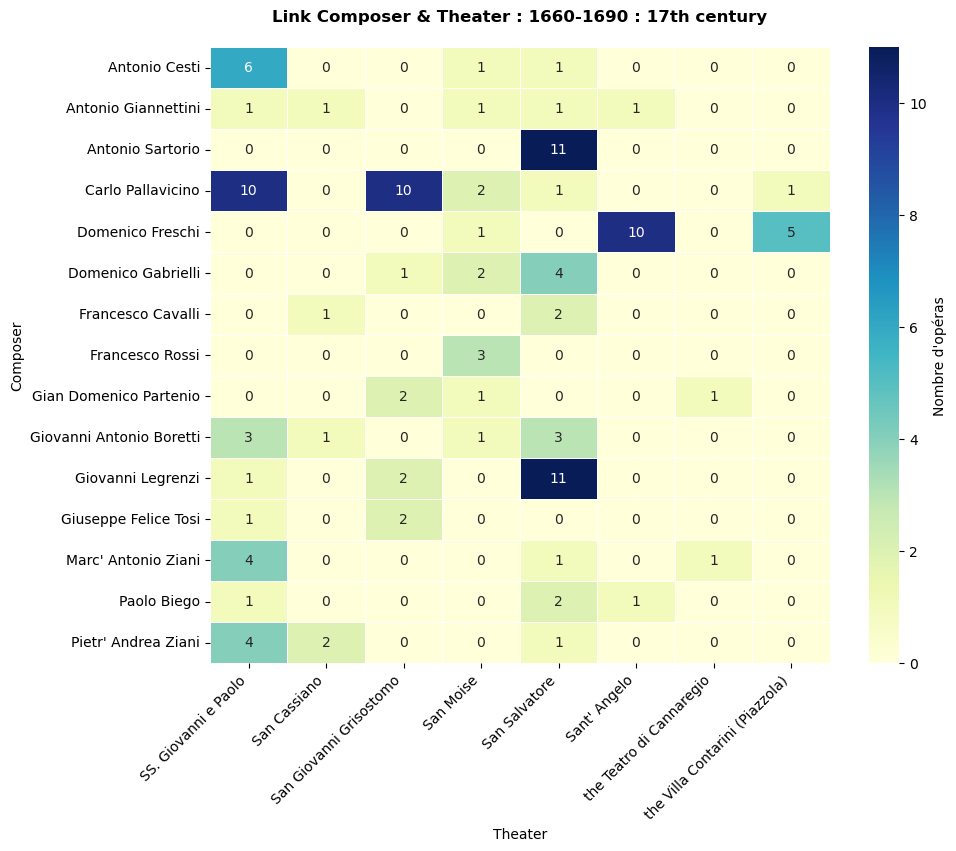

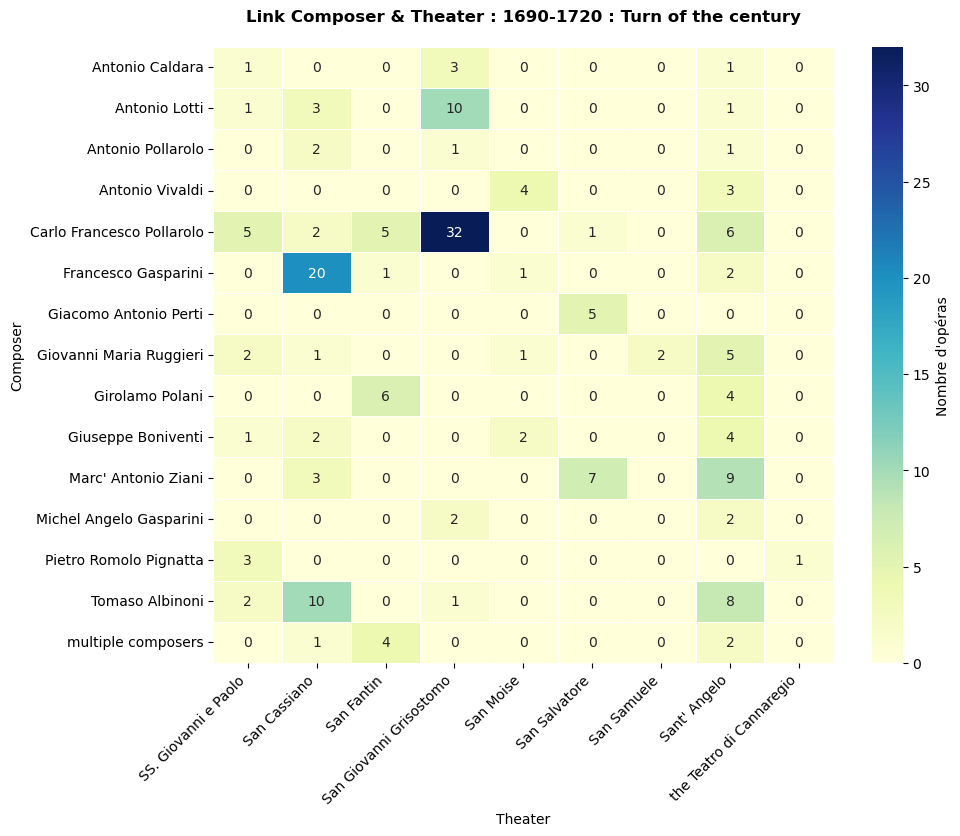

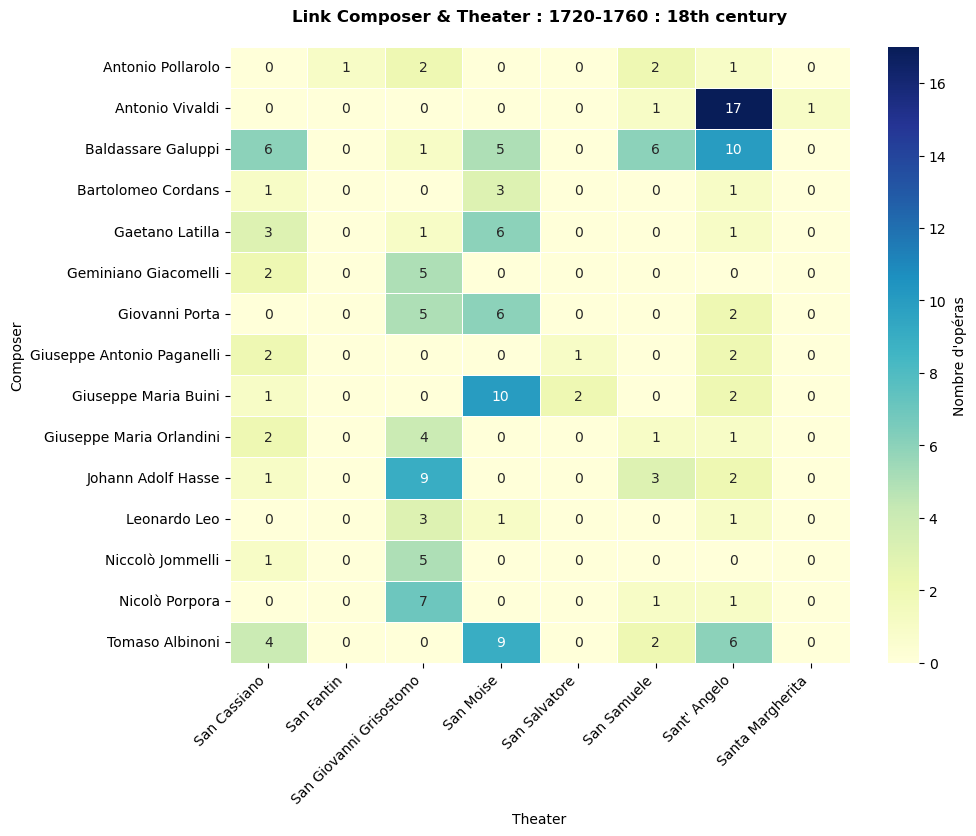

In [7]:
## 1 Get decades ##

# Filter NaN values for years

df = df.dropna(subset=['annee']) # Filter if no valid date
df['decennie'] = (df['annee'] // 10) * 10

## 2 Gantt diagramm for theaters ##

# Min and max for each theater
theatre_life = df.groupby('theatre')['annee'].agg(['min', 'max', 'count']).reset_index()

# If the theater closed the year it opened, adding 1 to visualize it.
theatre_life['Duree'] = theatre_life['max'] - theatre_life['min'] + 1

# Decreasing order sorting
theatre_life = theatre_life.sort_values('min', ascending=False)

# Visualisation

fig_gantt = px.bar(
    theatre_life, 
    x="Duree",        
    y="theatre",  
    base="min",
    orientation='h',
    color="count",
    title="Chronology of Venetian Theaters",
    labels={'min': 'Start year', 'count': 'Number of operas', 'theatre': 'Theater'},
    color_continuous_scale="Viridis",
    hover_data={'min': True, 'max': True, 'Duree': False} # Ce qu'on voit au survol
)

fig_gantt.update_layout(
    template="plotly_white",
    xaxis_title="année",
    yaxis_title=None
)
fig_gantt.show()

## 3 Sankey graph ##

# We keep only the TOP_NUMBER in each category
top_n = TOP_NUMBER
top_comp = df['compositeur'].value_counts().nlargest(top_n).index
top_lib = df['librettiste'].value_counts().nlargest(top_n).index
top_theatre = df['theatre'].value_counts().nlargest(top_n).index

df_sankey = df[df['compositeur'].isin(top_comp) & df['librettiste'].isin(top_lib) & df['theatre'].isin(top_theatre)]

# Writer to Composer
flow_1 = df_sankey.groupby(['librettiste', 'compositeur']).size().reset_index(name='value')
flow_1.columns = ['source', 'target', 'value']

# Composer to Theater
flow_2 = df_sankey.groupby(['compositeur', 'theatre']).size().reset_index(name='value')
flow_2.columns = ['source', 'target', 'value']

# Links and nodes
links = pd.concat([flow_1, flow_2], axis=0)
all_nodes = list(pd.concat([links['source'], links['target']]).unique())
node_map = {node: i for i, node in enumerate(all_nodes)}

# Transformation en indices pour Plotly
links['source_id'] = links['source'].map(node_map)
links['target_id'] = links['target'].map(node_map)

fig_sankey = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15, thickness=20, line=dict(color="black", width=0.5),
        label=all_nodes, color="blue"
    ),
    link=dict(
        source=links['source_id'],
        target=links['target_id'],
        value=links['value']
    ))])

fig_sankey.update_layout(title_text="Graph between writers, composers and theaters", font_size=10)
fig_sankey.show()

## 4 Heatmap of collaborations (Composer-Writer) ##

epoques = [
    {'label': '1660-1690 : 17th century', 'start': 1660, 'end': 1690},
    {'label': '1690-1720 : Turn of the century', 'start': 1690, 'end': 1720},
    {'label': '1720-1760 : 18th century', 'start': 1720, 'end': 1760}
]

for epoque in epoques:
    # Filter by era (the lower bound is excluded)
    mask = (df['annee'] >= epoque['start']) & (df['annee'] < epoque['end'])
    df_era = df[mask]
    
    # We keep only the TOP_NUMBER best composers and theaters
    top_comp_era = df_era['compositeur'].value_counts().nlargest(TOP_NUMBER).index
    top_theatre_era = df_era['theatre'].value_counts().nlargest(TOP_NUMBER).index
    
    df_era_filtered = df_era[
        df_era['compositeur'].isin(top_comp_era) & 
        df_era['theatre'].isin(top_theatre_era)
    ]
    
    matrix = df_era_filtered.pivot_table(
        index='compositeur', 
        columns='theatre', 
        values='annee', 
        aggfunc='count', 
        fill_value=0
    )
    
    # Visualisation
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        matrix, 
        annot=True,
        fmt="d",        # Integers
        cmap="YlGnBu",  # Palette
        linewidths=.5,
        cbar_kws={'label': "Nombre d'opéras"}
    )
    
    plt.title(f"Link Composer & Theater : {epoque['label']}\n", fontweight = 'bold')
    plt.ylabel('Composer')
    plt.xlabel('Theater')
    plt.xticks(rotation=45, ha='right')
    #plt.tight_layout()
    plt.show()

## 5 - Bump chart : Popularity by decade ##

# Number of operas by decade and by composer
df_trend = df.groupby(['decennie', 'compositeur']).size().reset_index(name='Count')

# Rank for each decade
df_trend['Rank'] = df_trend.groupby('decennie')['Count'].rank(method='first', ascending=False)

# Filter to reach at least the third of TOP_NUMBER
top_rankers = df_trend[df_trend['Rank'] <= TOP_NUMBER//3]['compositeur'].unique()
df_bump = df_trend[df_trend['compositeur'].isin(top_rankers) & (df_trend['Rank'] <= TOP_NUMBER)] # Showing TOP_NUMBER

fig_bump = px.line(
    df_bump, 
    x="decennie", 
    y="Rank", 
    color="compositeur",
    title="Most popular composer by decade",
    markers=True,
    template="plotly_white"
)

# First on the top
fig_bump.update_yaxes(autorange="reversed") 
fig_bump.show()

# Number of operas by decade and by writer
df_trend = df.groupby(['decennie', 'librettiste']).size().reset_index(name='Count')

# Rank for each decade
df_trend['Rank'] = df_trend.groupby('decennie')['Count'].rank(method='first', ascending=False)

# Filter to reach at least the third of TOP_NUMBER
top_rankers = df_trend[df_trend['Rank'] <= TOP_NUMBER//3]['librettiste'].unique()
df_bump = df_trend[df_trend['librettiste'].isin(top_rankers) & (df_trend['Rank'] <= TOP_NUMBER)]

fig_bump = px.line(
    df_bump, 
    x="decennie", 
    y="Rank", 
    color="librettiste",
    title="Most popular writer by decade",
    markers=True,
    template="plotly_white"
)

# First on the top
fig_bump.update_yaxes(autorange="reversed") 
fig_bump.show()

## 2 - Find turning points through chronology

-- Potential turning points about composers trends --
Around 1675
Around 1691
Around 1742
Around 1756


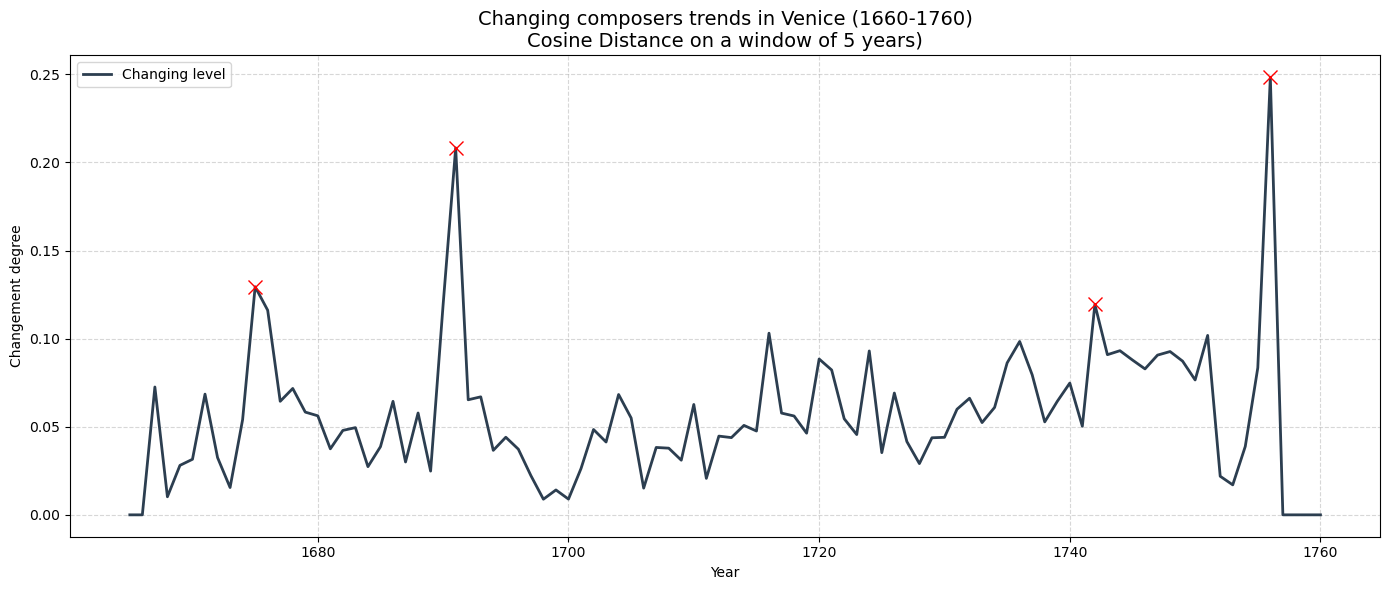

In [8]:
# Show when composer trends change
start_year = 1660
end_year = 1760

# Matrix : number of operas given by year and by composer
pivot_year = df.pivot_table(index='annee', columns='compositeur', aggfunc='size', fill_value=0)

# Years index
all_years = range(start_year, end_year + 1)
pivot_year = pivot_year.reindex(all_years, fill_value=0)

# Window of 5 years
window_size = 5
rolling_matrix = pivot_year.rolling(window=window_size).sum().dropna()

## Comparing evolution in trends 5 years by 5 years
## Cosine distance between vectors

distances = []
years_axis = []

matrix_values = rolling_matrix.values
index_years = rolling_matrix.index

for i in range(1, len(matrix_values)):
    vec_prev = matrix_values[i-1]      # Previous vector
    vec_curr = matrix_values[i]        # Current vector
    
    # If vector is 0, distance is set to 0
    if np.sum(vec_prev) == 0 or np.sum(vec_curr) == 0:
        dist = 0 
    else:
        dist = cosine(vec_prev, vec_curr)   # cosine distance
    
    distances.append(dist)
    years_axis.append(index_years[i])

## Searching to peaks (changes of trends)

distances = np.array(distances)

# For a peak, we need at least a prominence of 0.1.
peaks, _ = find_peaks(distances, prominence=0.1) 
peak_years = [years_axis[p] for p in peaks]

print("-- Potential turning points about composers trends --")
for year in peak_years:
    print(f"Around {year}")

## Visualisation

plt.figure(figsize=(14, 6))

plt.plot(years_axis, distances, color='#2c3e50', linewidth=2, label='Changing level')

# Peaks
plt.plot([years_axis[p] for p in peaks], distances[peaks], "x", color='red', markersize=10)

plt.title(f"Changing composers trends in Venice ({start_year}-{end_year})\nCosine Distance on a window of {window_size} years)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Changement degree")
plt.grid(True, linestyle='--', alpha=0.5)

plt.legend()
plt.tight_layout()
plt.show()

## 3 - Morphology of theaters

C:\Users\chris\AppData\Local\Temp\ipykernel_42224\3468002572.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




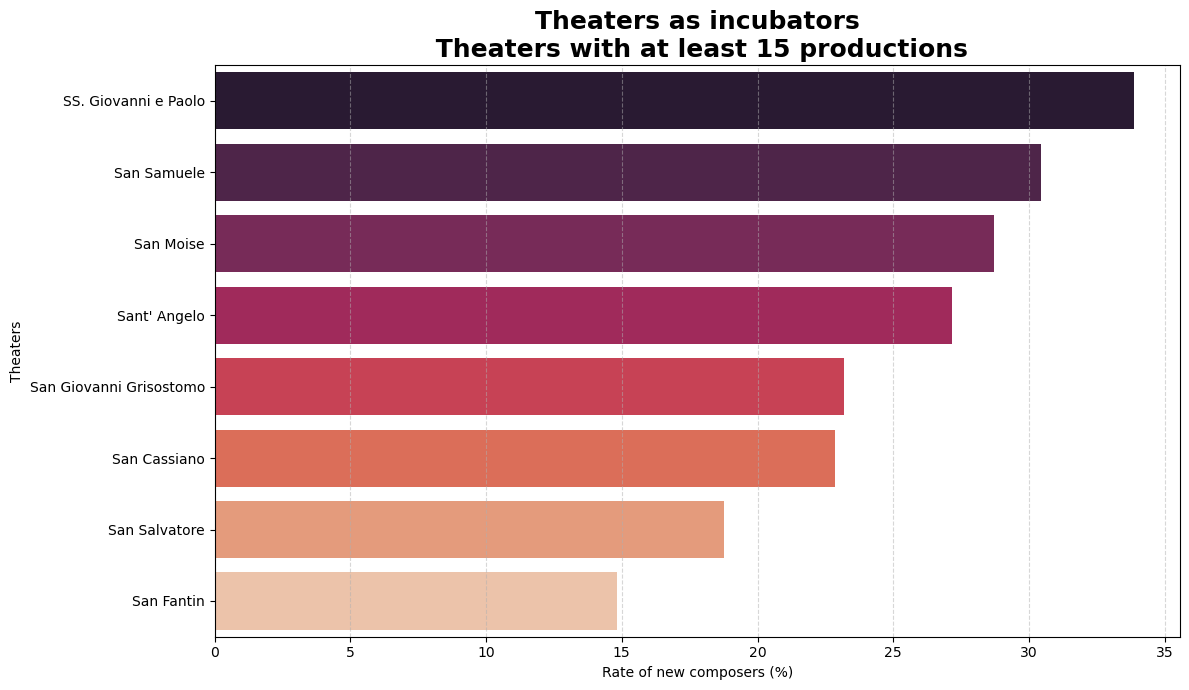

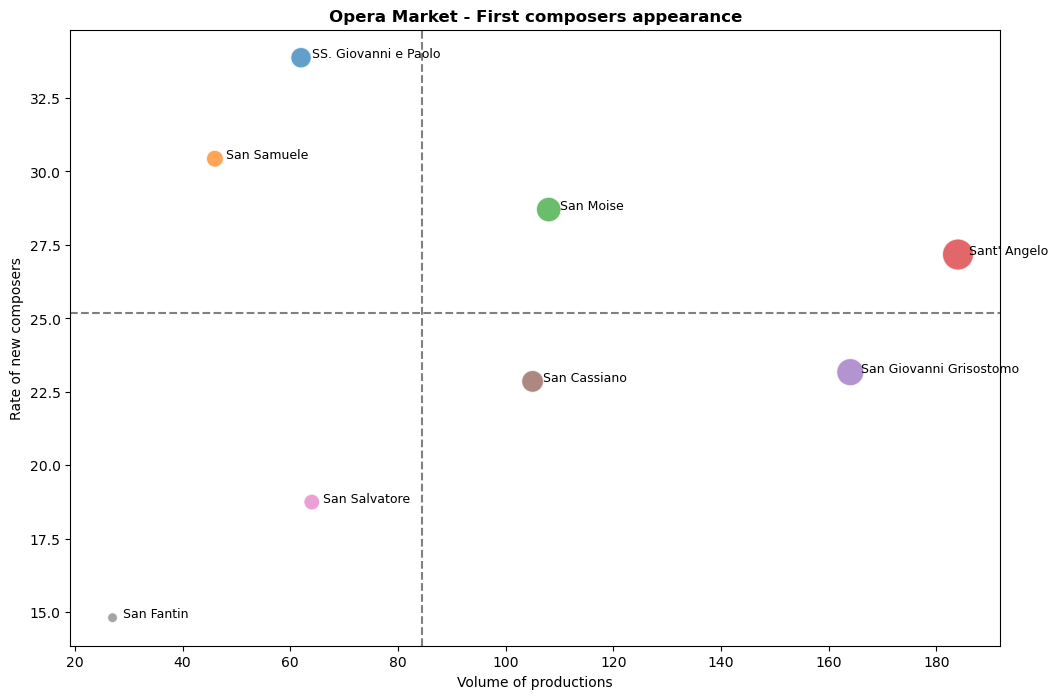

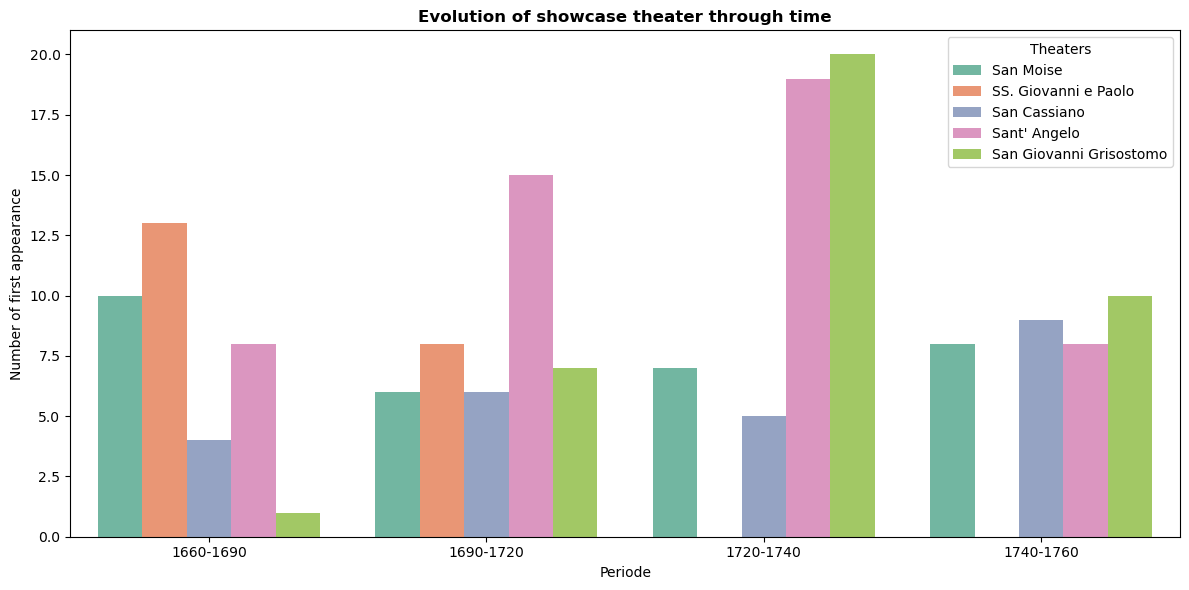

In [9]:
## Theaters as incubators - Showcase

# Number of operas by theater
total_productions = df['theatre'].value_counts().reset_index()
total_productions.columns = ['Theatre', 'Total_Prod']

# Number of first appearance by theater
first_appearance = df.sort_values('annee').drop_duplicates(subset=['compositeur'], keep='first')
debut_counts = first_appearance['theatre'].value_counts().reset_index()
debut_counts.columns = ['Theatre', 'Nb_Debuts']

# Merging data
stats = pd.merge(total_productions, debut_counts, on='Theatre', how='left')
stats['Nb_Debuts'] = stats['Nb_Debuts'].fillna(0) # Replace NaN by 0

# We keep only the TOP_NUMBER theaters
stats_filtered = stats[stats['Total_Prod'] >= TOP_NUMBER].copy()

# Ratio of new appearance (division by the total number of productions)
stats_filtered['Taux_Risque'] = (stats_filtered['Nb_Debuts'] / stats_filtered['Total_Prod']) * 100
stats_filtered = stats_filtered.sort_values('Taux_Risque', ascending=False)

# 1 -- Visualisation by rate

plt.figure(figsize=(12, 7))

# Barplot
sns.barplot(data=stats_filtered.head(15), x='Taux_Risque', y='Theatre', palette='rocket')

plt.title(f"Theaters as incubators\n Theaters with at least {TOP_NUMBER} productions", fontsize=18, fontweight='bold')
plt.xlabel("Rate of new composers (%)")
plt.ylabel("Theaters")
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# 2 -- Visualisation as a scatter plot
# Combining Risk and Range of theaters

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=stats_filtered, 
    x='Total_Prod', 
    y='Taux_Risque', 
    size='Nb_Debuts', 
    sizes=(50, 500), 
    hue='Theatre',
    legend=False,
    alpha=0.7
)

# Labels
for i in range(stats_filtered.shape[0]):
    row = stats_filtered.iloc[i]
    # Need enough volume to be set.
    if row['Total_Prod'] > 50 or row['Taux_Risque'] > 10:
        plt.text(row['Total_Prod']+2, row['Taux_Risque'], row['Theatre'], fontsize=9)

plt.title("Opera Market - First composers appearance", fontweight = 'bold')
plt.xlabel("Volume of productions")
plt.ylabel("Rate of new composers")

plt.axvline(x=stats_filtered['Total_Prod'].median(), color='grey', linestyle='--')
plt.axhline(y=stats_filtered['Taux_Risque'].median(), color='grey', linestyle='--')

plt.show()

# 3 -- Visualisation through time

# Take the TOP_NUMBER most important theaters for first appearing
incubators_top = debut_counts.head(TOP_NUMBER)

# Visualisation 
first_appearance['Periode'] = pd.cut(first_appearance['annee'], 
                                     bins=[1660, 1690, 1720, 1740, 1760], 
                                     labels=['1660-1690', '1690-1720', '1720-1740', '1740-1760'])

top_incubators_names = incubators_top['Theatre'].tolist()
df_inc_evo = first_appearance[first_appearance['theatre'].isin(top_incubators_names[:5])] # Top 5 only

plt.figure(figsize=(12, 6))
sns.countplot(data=df_inc_evo, x='Periode', hue='theatre', palette='Set2')
plt.title("Evolution of showcase theater through time", fontweight = 'bold')
plt.ylabel("Number of first appearance")
plt.legend(title="Theaters")
plt.tight_layout()
plt.show()

## 4 - Artistic ecosystem on Venise

In [10]:
# This cell is AI-Gen (Gemini 3.0)

def get_season_from_date(date_str):
    """
    Get the season from the date
    """
    if pd.isna(date_str): return None
    s = str(date_str).lower()
    
    # Textes
    if 'carn' in s or 'wint' in s: return 'Winter (Carnival)'
    if 'ascen' in s or 'sensa' in s: return 'Spring (Ascension)'
    if 'autu' in s or 'fall' in s: return 'Fall'
    if 'summ' in s: return 'Summer'
    
    # Mois Texte
    if any(m in s for m in ['dec', 'jan', 'feb', 'mar', 'dic', 'gen', 'fev']): return 'Winter (Carnival)'
    if any(m in s for m in ['apr', 'may', 'jun', 'avr', 'mag', 'giu']): return 'Spring (Ascension)'
    if any(m in s for m in ['oct', 'nov', 'ott']): return 'Fall'
    if any(m in s for m in ['jul', 'aug', 'sep', 'lug', 'ago', 'set']): return 'Summer'

    # Mois Numérique
    match = re.search(r'[\/-](\d{1,2})[\/-]', s)
    if match:
        try:
            month = int(match.group(1))
            if month in [12, 1, 2, 3]: return 'Winter (Carnival)'
            if month in [5, 6]:     return 'Spring (Ascension)'
            if month == 4:   return 'Lent' 
            if month in [10, 11]:      return 'Fall'
            if month in [7, 8, 9]:     return 'Summer'
        except:
            pass
            
    return None

In [11]:
# Find season from the date

df['Saison_Calc'] = df['start'].apply(get_season_from_date)

# two queries : operas in the Summer, operas in Lent

# Operas in summer
ete_operas = df[df['Saison_Calc'] == 'Summer']
careme_operas = df[df['Saison_Calc'] == 'Lent']
if not ete_operas.empty:
    print(f"\n {len(ete_operas)} Operas played during the Summer :\n")
    print(ete_operas[['titre', 'annee', 'theatre']].to_string(index=False))
else:
    print("\nNo opera played during the Summer.")

if not careme_operas.empty:
    print(f"\n{len(careme_operas)} Operas played during Lent :\n")
    print(careme_operas[['titre', 'annee', 'theatre']].to_string(index=False))
else:
    print("\nNo operas played during Lent.")

# 2. Voir les dates toujours non matchées (Probablement juste l'année)
non_matche = df[df['Saison_Calc'].isna()]
print(f"\n--- Not resolved years : {len(non_matche)} ---")
if not non_matche.empty:
    print(non_matche[[col_titre, col_date]].head(10).to_string(index=False))


 3 Operas played during the Summer :

               titre  annee                        theatre
Gli amori d'Alidaura   1685 the Villa Contarini (Piazzola)
           Ermelinda   1685 the Villa Contarini (Piazzola)
     Imeneo in Atene   1726                    San Samuele

No operas played during Lent.

--- Not resolved years : 0 ---


Saisons identifiées : 777 sur 777 opéras (100.0%)


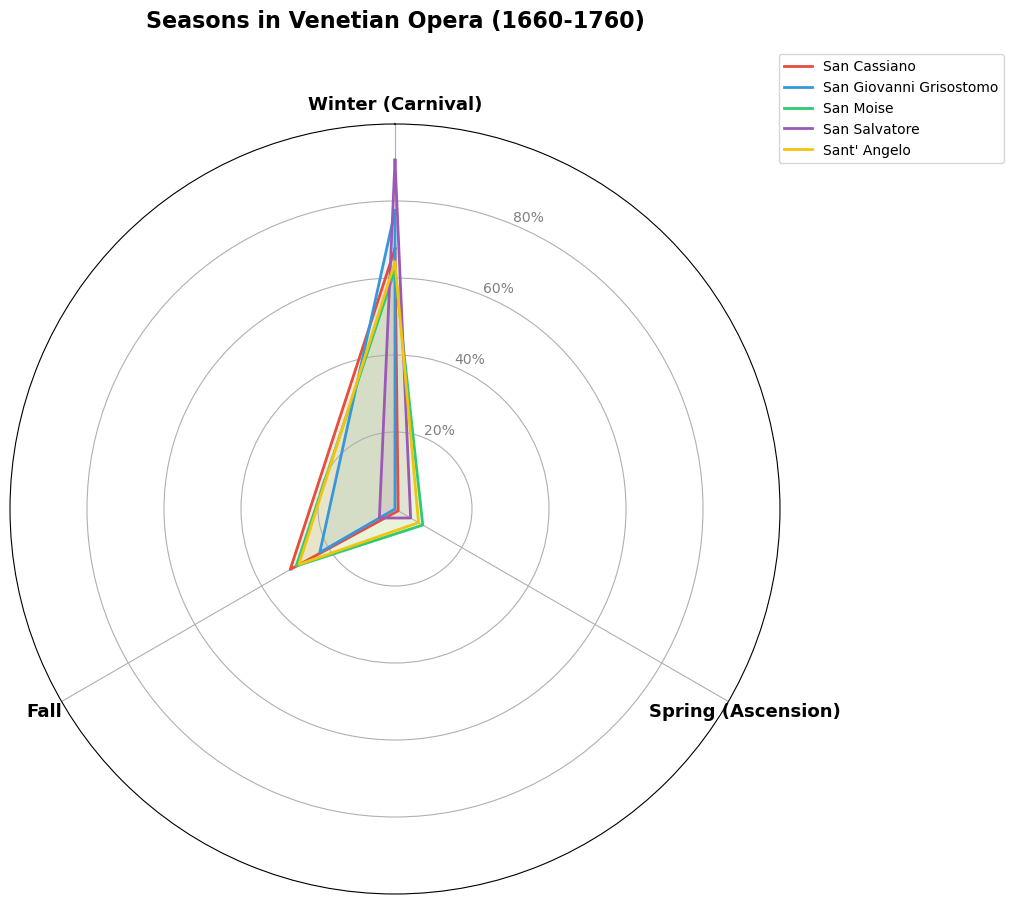

In [12]:
## Seasons of operas in each theater

# Get the season
df['Saison_Calc'] = df['start'].apply(get_season_from_date)

# Success of getting the season
total = len(df)
found = df['Saison_Calc'].notna().sum()
print(f"Saisons identifiées : {found} sur {total} opéras ({found/total:.1%})")

# Visualisation

# Filter the data if problems for getting the season
df_clean = df.dropna(subset=['Saison_Calc'])

top_theatres = df_clean['theatre'].value_counts().nlargest(5).index.tolist()
df_viz = df_clean[df_clean['theatre'].isin(top_theatres)]

# Percentage calculation
season_counts = df_viz.groupby(['theatre', 'Saison_Calc']).size().unstack(fill_value=0)
# Convert to percentage
season_pct = season_counts.div(season_counts.sum(axis=1), axis=0) * 100

# Getting the right order
order = ['Winter (Carnival)', 'Spring (Ascension)', 'Fall']
season_pct = season_pct[order]

## Visualisation 

labels = list(season_pct.columns)
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] # Fermeture de la boucle

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6', '#f1c40f']

for idx, (theatre, row) in enumerate(season_pct.iterrows()):
    values = row.tolist()
    values += values[:1] # Fermeture
    
    ax.plot(angles, values, linewidth=2, label=theatre, color=colors[idx % len(colors)])
    ax.fill(angles, values, color=colors[idx % len(colors)], alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, size=13, fontweight='bold')

plt.yticks([20, 40, 60, 80], ["20%", "40%", "60%", "80%"], color="grey", size=10)
plt.ylim(0, 100)

plt.title(f"Seasons in Venetian Opera (1660-1760)\n", y=1.08, fontsize=16, fontweight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()

In [13]:
# This cell is AI-Gen (Gemini 3.0)

def extract_date_info(date_str):
    if pd.isna(date_str): return None, None
    s = str(date_str).lower()
    
    # --- 1. Extraction de l'Année ---
    match_year = re.search(r'\d{4}', s)
    year = int(match_year.group(0)) if match_year else None
    
    # --- 2. Extraction de la Saison ---
    season = None
    
    # Hiver (Carnaval) : Déc, Jan, Fév, Mar
    if any(m in s for m in ['dec', 'jan', 'feb', 'mar', 'dic', 'gen', 'fev', 'carn']):
        season = 'Winter (Carnival)'
    # Printemps (Ascension) : Avr, Mai, Juin
    elif any(m in s for m in ['apr', 'may', 'jun', 'avr', 'mag', 'giu', 'ascen', 'sensa']):
        season = 'Spring (Ascension)'
    # Automne : Oct, Nov
    elif any(m in s for m in ['oct', 'nov', 'ott', 'autu', 'fall']):
        season = 'Fall'
    # Été (Rare) : Juil, Aout, Sept
    elif any(m in s for m in ['jul', 'aug', 'sep', 'lug', 'ago', 'set']):
        season = 'Summer'
    # Tentative numérique MM/YYYY
    elif re.search(r'[\/-]\d{1,2}[\/-]', s):
        m = int(re.search(r'[\/-](\d{1,2})[\/-]', s).group(1))
        if m in [12, 1, 2, 3]: season = 'Winter (Carnival)'
        elif m in [4, 5, 6]: season = 'Spring (Ascension)'
        elif m in [10, 11]: season = 'Fall'
        elif m in [7, 8, 9]: season = 'Summer'

    return year, season


Répartition des opéras (en %) :
Saison        Winter (Carnival)  Spring (Ascension)  Fall  Summer
Periode                                                          
1. 1660-1690               92.5                 0.0   6.2     1.2
2. 1690-1740               64.7                 6.6  28.5     0.2
3. 1740-1760               52.1                18.8  29.2     0.0


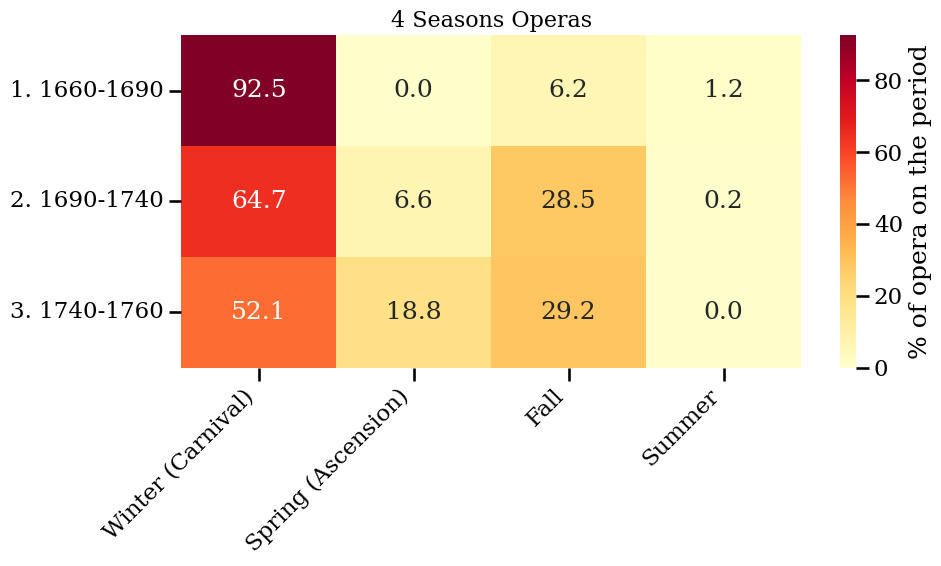

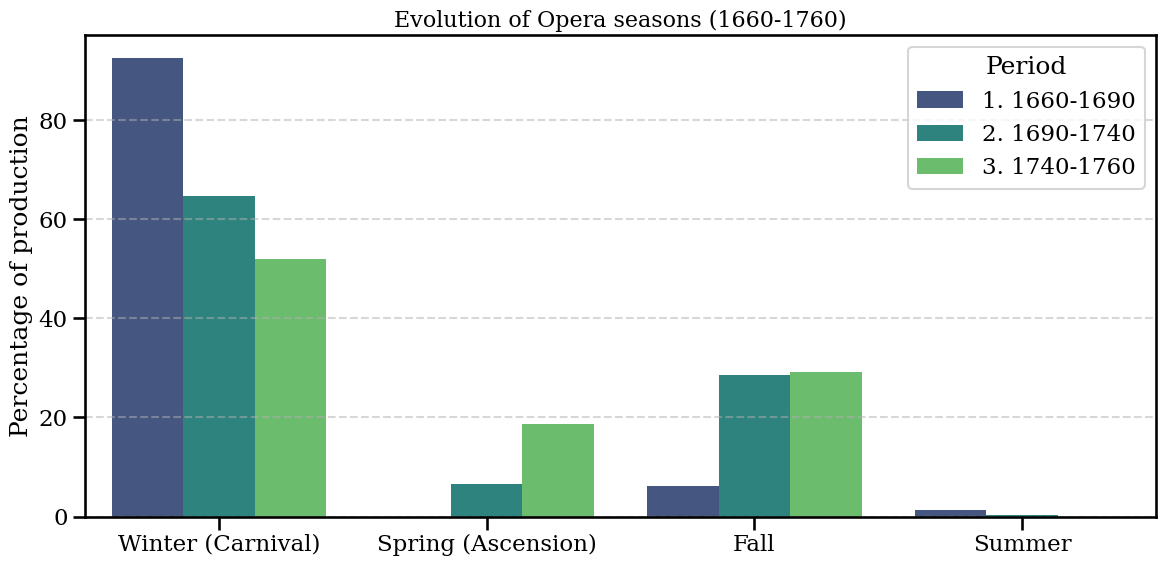

In [17]:
# Application
data_extracted = df['start'].apply(extract_date_info)
df['Annee'] = data_extracted.apply(lambda x: x[0])
df['Saison'] = data_extracted.apply(lambda x: x[1])

# Filter by year and season
df_clean = df.dropna(subset=['Annee', 'Saison']).copy()

def get_period(year):
    if 1660 <= year < 1690: return '1. 1660-1690'
    if 1690 <= year < 1740: return '2. 1690-1740'
    if 1740 <= year <= 1760: return '3. 1740-1760'
    return None

df_clean['Periode'] = df_clean['Annee'].apply(get_period)
df_clean = df_clean.dropna(subset=['Periode'])

# Crossed tab (Period x Season)
cross_tab = pd.crosstab(df_clean['Periode'], df_clean['Saison'])

# Percentage conversion
cross_tab_pct = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Seasons' order
saison_order = ['Winter (Carnival)', 'Spring (Ascension)', 'Fall', 'Summer']
# On garde seulement les colonnes qui existent dans les données
cols_existantes = [c for c in saison_order if c in cross_tab_pct.columns]
cross_tab_pct = cross_tab_pct[cols_existantes]

print("Répartition des opéras (en %) :")
print(cross_tab_pct.round(1))

# Visualisation

# Style
plt.rcParams['font.family'] = 'serif'
sns.set_context("talk")

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab_pct, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label': '% of opera on the period'})
plt.title("4 Seasons Operas", fontsize=16)
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Bar chart
df_viz = cross_tab_pct.reset_index().melt(id_vars='Periode', var_name='Saison', value_name='Pourcentage')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_viz, x='Saison', y='Pourcentage', hue='Periode', palette='viridis')

plt.title("Evolution of Opera seasons (1660-1760)", fontsize=16)
plt.ylabel("Percentage of production")
plt.xlabel("")
plt.legend(title="Period")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

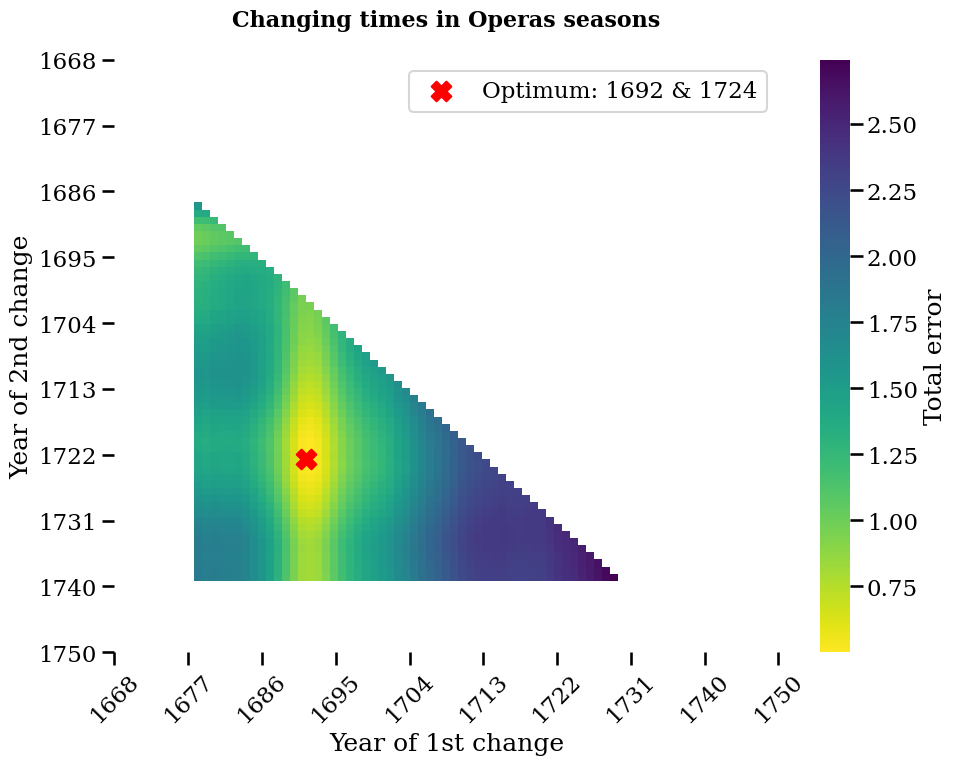

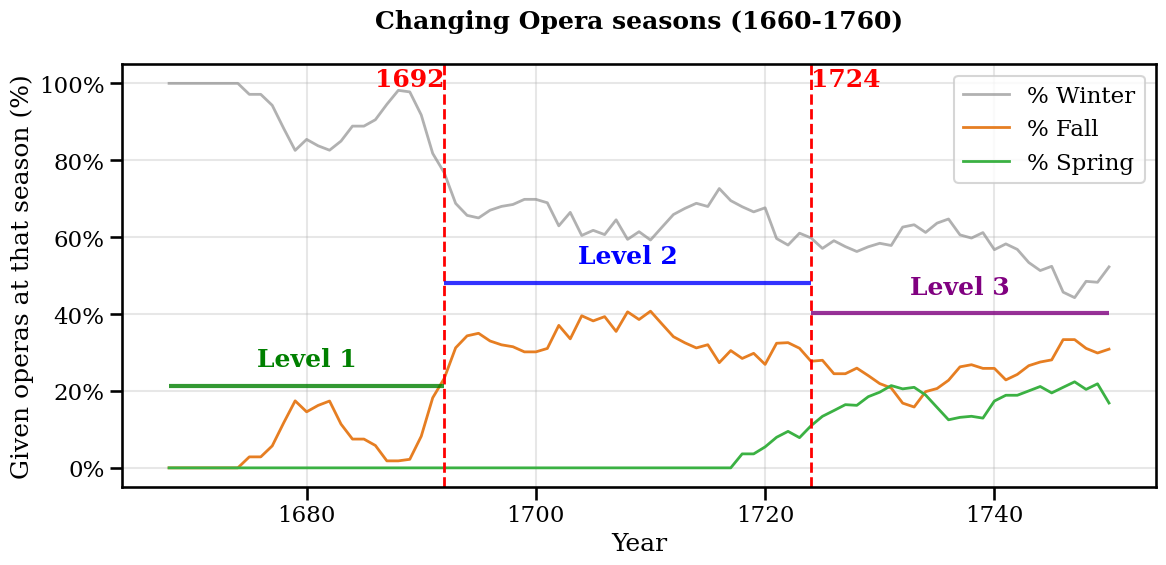

In [18]:
# Extracting 
data_extracted = df['start'].apply(extract_date_info)
df['Annee'] = data_extracted.apply(lambda x: x[0])
df['Saison'] = data_extracted.apply(lambda x: x[1])

# Matrix : Year x Season
df_clean = df.dropna(subset=['Annee', 'Saison'])
pivot = pd.crosstab(df_clean['Annee'], df_clean['Saison'], normalize='index')
all_years = np.arange(int(df_clean['Annee'].min()), int(df_clean['Annee'].max()) + 1)
pivot = pivot.reindex(all_years, fill_value=0)

# Window on 5 years
pivot_smooth = pivot.rolling(window=5, center=True).mean().dropna()
years = pivot_smooth.index.values
data_matrix = pivot_smooth.values

# Loss matrix
n = len(data_matrix)
cost_matrix = np.full((n, n), np.nan) # Matrice vide

# Least squares

def get_cost(segment):
    if len(segment) < 2: return 0
    return np.sum((segment - np.mean(segment, axis=0))**2)

# Minimum gap of 10 years between each limit.
min_gap = 10 

# Filling loss matrix
for i in range(min_gap, n - 2 * min_gap):
    for j in range(i + min_gap, n - min_gap):
        c1 = get_cost(data_matrix[:i])
        c2 = get_cost(data_matrix[i:j])
        c3 = get_cost(data_matrix[j:])
        cost_matrix[j, i] = c1 + c2 + c3 # j and i are inversed.

# Optimization over the cost matrix
min_val = np.nanmin(cost_matrix)
min_coords = np.where(cost_matrix == min_val)
best_y_idx, best_x_idx = min_coords[0][0], min_coords[1][0]
best_year_1 = years[best_x_idx]
best_year_2 = years[best_y_idx]

### Visualisation ###

fig, ax = plt.subplots(figsize=(10, 8))

# Heatmap
sns.heatmap(cost_matrix, xticklabels=False, yticklabels=False, cmap="viridis_r", ax=ax, cbar_kws={'label': 'Total error'})

ax.set_xticks(np.linspace(0, n, 10))
ax.set_xticklabels(np.linspace(years[0], years[-1], 10).astype(int), rotation=45)
ax.set_yticks(np.linspace(0, n, 10))
ax.set_yticklabels(np.linspace(years[0], years[-1], 10).astype(int))

# Optimal point with a red X
ax.scatter(best_x_idx, best_y_idx, color='red', s=200, marker='X', label=f'Optimum: {best_year_1} & {best_year_2}')

plt.title("Changing times in Operas seasons\n", fontsize=16, fontweight='bold')
plt.xlabel("Year of 1st change")
plt.ylabel("Year of 2nd change")
plt.legend()
plt.tight_layout()
plt.show()

### Visualisation 2 ###

plt.figure(figsize=(12, 6))

# Lines for Winter, Fall and Spring
plt.plot(years, pivot_smooth['Winter (Carnival)'], label='% Winter', color='#909090', linewidth=2, alpha=0.7)
if 'Fall' in pivot_smooth.columns:
    plt.plot(years, pivot_smooth['Fall'], label='% Fall', color='#e67e22', linewidth=2)
if 'Spring (Ascension)' in pivot_smooth.columns:
    plt.plot(years, pivot_smooth['Spring (Ascension)'], label='% Spring', color='#3bb143', linewidth=2)

# Lines for rupture years
plt.axvline(x=best_year_1, color='red', linestyle='--', linewidth=2)
plt.axvline(x=best_year_2, color='red', linestyle='--', linewidth=2)

# Important dates
plt.text(best_year_1, 0.98, f'{int(best_year_1)}', color='red', 
         fontweight='bold', ha='right', va='bottom')
plt.text(best_year_2, 0.98, f'{int(best_year_2)}', color='red', 
         fontweight='bold', ha='left', va='bottom')

# Levels by period
periods = [(years[0], best_year_1), (best_year_1, best_year_2), (best_year_2, years[-1])]
colors_p = ['green', 'blue', 'purple']

for i, (start, end) in enumerate(periods):
    # Mask for the period
    mask = (years >= start) & (years < end)
    if not any(mask): continue
    
    # Mean for Fall season
    if 'Fall' in pivot_smooth.columns:
        mean_val = pivot_smooth.loc[mask, 'Fall'].mean()
        plt.hlines(mean_val + 0.15, xmin=start, xmax=end, color=colors_p[i], linestyle='-', linewidth=3, alpha=0.8)
        plt.text(start + (end-start)/2, mean_val + 0.2, f"Level {i+1}", color=colors_p[i], fontweight='bold', ha='center')

plt.title(f"Changing Opera seasons (1660-1760)\n", fontsize=18, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Given operas at that season (%)")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Found years

cut_year_1 = 1692
cut_year_2 = 1724

def apply_algo_period(y):
    if y < cut_year_1: return f'1. 1660 - {cut_year_1}'
    if y < cut_year_2: return f'2. {cut_year_1} - {cut_year_2}'
    return f'3. {cut_year_2} - 1760'

df_clean['Algo_Period'] = df_clean['Annee'].apply(apply_algo_period)

# Percentages calculation for visualisation
viz_data = pd.crosstab(df_clean['Algo_Period'], df_clean['Saison'], normalize='index') * 100
viz_data = viz_data[['Winter (Carnival)', 'Fall', 'Spring (Ascension)']] # Ordre logique

# Graph
ax = viz_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#c7c2be', '#e67e22', '#3bb143'], alpha=0.9)

plt.title(f"Changing Opera Seasons in Venice (1660-1760) \n", fontsize=16, fontweight='bold')
plt.ylabel("Part of Year Programmation (%)")
plt.xlabel("Periods")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.axvline(x=0.5, color='white', linestyle='--', linewidth=2)
plt.axvline(x=1.5, color='white', linestyle='--', linewidth=2)

for c in ax.containers:
    ax.bar_label(c, fmt='%.0f%%', label_type='center', color='black', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 5 - Venice versus the world

JSON chargé : 100 entités.

--- Analyse du Recyclage (CSV) ---
Top reused names
                  Titre  Nb_Compositeurs
65            Artaserse                7
614             Statira                5
191            Griselda                5
157             Farnace                4
641           Venceslao                4
542              Merope                4
344         L'Olimpiade                4
52   Armida abbandonata                3


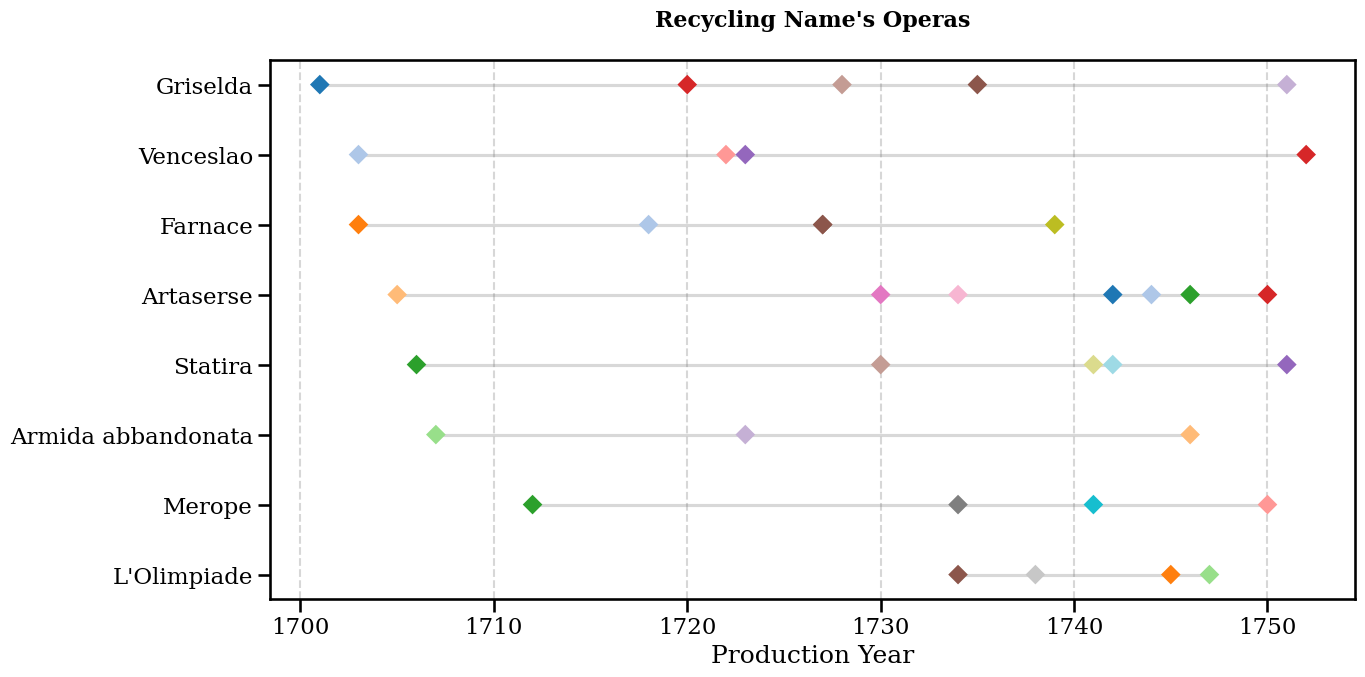

In [19]:
# This cell is AI-Gen (Gemini 3.0)

# ==============================================================================
# 1. CHARGEMENT ET PRÉPARATION DES DONNÉES
# ==============================================================================

# Chargement du JSON
try:
    with open('entity_occurrences.json', 'r', encoding='utf-8') as f:
        json_data = json.load(f)
    print(f"JSON chargé : {len(json_data)} entités.")
except Exception as e:
    print(f"Erreur JSON : {e}")
    json_data = []

# ==============================================================================
# 3. ANALYSE 2 : LA GÉNÉALOGIE DES HITS (Recyclage dans le CSV)
# ==============================================================================
print("\n--- Analyse du Recyclage (CSV) ---")



# 1. Identifier les titres les plus recyclés (plus grand nombre de compositeurs uniques)
recycling = df.groupby('titre')['compositeur'].nunique().reset_index()
recycling.columns = ['Titre', 'Nb_Compositeurs']
top_hits = recycling.sort_values('Nb_Compositeurs', ascending=False).head(8) # Top 8

print("Top reused names")
print(top_hits)

# 2. Extraire les détails pour ces hits
top_titles_list = top_hits['Titre'].tolist()
df_hits_timeline = df[df['titre'].isin(top_titles_list)].copy()

# Extraction année
def extract_year(d):
    m = re.search(r'\d{4}', str(d))
    return int(m.group(0)) if m else None

df_hits_timeline['annee'] = df_hits_timeline['start'].apply(extract_year)
df_hits_timeline = df_hits_timeline.dropna(subset=['annee'])

# Visualisation (Scatter Plot Temporel)
plt.figure(figsize=(14, 7))
sns.stripplot(data=df_hits_timeline, x='annee', y='titre', hue='compositeur', 
              jitter=False, size=10, marker="D", palette='tab20', legend=False)

# Lignes connectrices
for title in top_titles_list:
    subset = df_hits_timeline[df_hits_timeline['titre'] == title]
    plt.hlines(y=title, xmin=subset['annee'].min(), xmax=subset['annee'].max(), color='gray', alpha=0.3)

plt.title("Recycling Name's Operas\n", fontsize=16, fontweight='bold')
plt.xlabel("Production Year")
plt.ylabel(None)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()

## References :

This notebook has been made with the assistant of Gemini 3.0 for debugging and structure.<br>
All cells have been verified and changed (except if mentionned), comments in particular.